# **Thiết lập cấu hình**

In [1]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True);sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

# **Mô tả**

Trong kinh tế, việc cạnh tranh về giá là một vấn đề rất quan trọng với người bán. Việc định giá tốt sẽ giúp tối ưu lợi nhuận sản phẩm. Đặc biệt với những sản phẩm bán lẻ có giá bán thấp, việc tối ưu hóa về giá lại càng được quan tâm hơn. Việc này thường được dựa vào rất nhiều yếu tối, tuy nhiên một trong những căn cứ quan trọng đó là *độ co giãn (nhạy cảm) về giá* với nhu cầu của sản phẩm.

[Độ co giãn của giá (Price elasticity)](https://en.wikipedia.org/wiki/Price_elasticity_of_demand) là nền tảng của việc tối ưu hóa giá. Nó có thể được trực quan hóa bởi đồ thị đường cong gọi là [*đường nhu cầu (demand curve)*](https://en.wikipedia.org/wiki/Demand_curve) thể hiện quan hệ giữa giá và số lượng sản phẩm bán được.

<img style="text-align: center;" src="./static/images/Own-price-Elasticity-of-Demand.jpg" width="500" height="400">

Dựa vào đường cong này có thể đánh giá được mức độ co giãn về giá (elastic và inelastic) của sản phẩm.

<img style="text-align: center;" src="./static/images/elastic-and-inelastic.PNG" width="600" height="300">

- Ở hình bên trái, khi giá tăng 10% (từ 50 lên 60) thì số lượng sản phẩm giảm đi 50%. Như vậy, nhu cầu nhạy cảm về giá. Điều này rất bất lợi cho người bán vì sẽ khó tăng lợi nhuận từ việc tăng giá sản phẩm.

- Ở hình bên phải, khi giá tăng lên 40% thì số lượng sản phẩm chỉ giảm đi 10%. Chứng tỏ, nhu cầu ít nhạy cảm về giá. Điều này lại rất có lợi cho người bán khi họ có thể tăng giá để tăng lợi nhuận mà không lo giảm doanh thu.

<img style="text-align: center;" src="./static/images/exam-inelastic.PNG">

Vậy để tính được độ co giãn về giá có khó không? Khá đơn giản để xây dựng một mô hình hồi quy thể hiện đường cong này nếu chỉ có 2 biến là PRICE và QUANTITY từ dữ liệu bán hàng. Tuy nhiên, trên thực tế lại có rất nhiều yếu tố khác ảnh hưởng tới số lượng chứ không riêng gì giá sản phẩm (ví dụ như sản phẩm bán theo combo, ngày nghỉ lễ,...). Điều này sẽ gây khó khăn cho việc xây dựng đường cong nhu cầu kể trên. Tuy nhiên, nhờ công nghệ học máy mà chúng ta có thể sử dụng tất cả thông tin thu thập bên ngoài để đánh giá mức độ ảnh hưởng tới độ co giãn và đưa ra mô hình hồi quy tốt nhất.

Trong nghiên cứu sau đây, chúng tôi sử dụng dữ liệu giao dịch của một nhà hàng Burger Café trong tòa nhà Microsoft ở Trung Quốc để chỉ ra cách có được độ co giãn về giá khi thêm thông tin về combo sản phẩm và thông tin bên ngoài bao gồm thời tiết và kỳ nghỉ vào mô hình định giá. Đây là thử nghiệm demo thứ ba trong Hội thảo trực tuyến của [Cortana Analytics](https://social.technet.microsoft.com/wiki/contents/articles/36688.introduction-to-cortana-intelligence-suite.aspx#Machine_Learning_and_Analytics) về Giá bán lẻ ([Cortana Analytics Webinar for Retail Pricing](https://learn.microsoft.com/sv-se/shows/cloud-and-enterprise-premium/cortana-analytics-retail-pricing))

- Đầu vào: Giá và nhu cầu hàng ngày của burger. Thông tin về combo sản phẩm. Các tính năng bên ngoài.

- Mô hình: Hồi quy tuyến tính, Rừng cây quyết định

- Đầu ra: Độ co giãn giá của bánh mì kẹp thịt. Xem cổng đầu ra của 'Train Model'. Trọng số tính năng của 'Log_Price' là độ co giãn của giá.

Từ khóa: Tối ưu giá bán lẻ, Độ co giãn về giá, Khai phá dữ liệu, Học máy, Hồi quy tuyến tính, Rừng cây quyết định

# **Exploratory Data Analysis**

Điều đầu tiên cần làm là cố gắng hiểu rõ nhất về dữ liệu. Điều này đạt được bằng cách khám phá nó bằng một số công cụ thống. Cụ thể chúng ta sử dụng thư viện pandas, numpy trong python để xử lí. Bên cạnh đấy là thư viện matplotlib, seaborn để trực quan hóa bằng hình ảnh.

Đây là bước hết sức quan trọng trong việc xây dựng mô hình học máy. Đầu vào tốt thì mới có thể có đầu ra được. Thường nhà khoa học dữ liệu sẽ phải mất 60 - 70% thời gian cho việc khám phá và xử lí dữ liệu này. 

Đọc bài viết sau để hiểu rõ hơn về EDA nhé: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

Các bước cơ bản như sau:

- Variable Identification

- Univariate Analysis

- Bi-variate Analysis

- Missing values treatment

- Outlier treatment

- Variable transformation

- Variable / Feature creation

Giờ đi lần lượt các bước này với bộ data của chúng ta nhé. Lần lượt tìm hiểu từng bộ data, từng trường giá trị trong đấy để hiểu rõ về dữ liệu của mình nhé. Đây là bước hết sức quan trọng trong việc xây dựng một mô hình học máy nhé. Bạn cần hiểu rõ điều này để đi từng bước thật chắc chắn nhé

## **Variable Identification**

Data đang được lưu dưới định dạng .csv. Ta dùng thư viện pandas để đọc nó nhé.

In [2]:
# Load data from file csv
transactions = pd.read_csv('./Data/Cafe-Transaction-Store.csv')
sold = pd.read_csv('./Data/Cafe-Sell-Meta-Data.csv')
date_info = pd.read_csv('./Data/Cafe-DateInfo.csv')

Biến thời gian theo ngày, khi load ra nó ở định dạng string. Tui convert nó về định dạng datetime trong pandas để tiện bề xử lí nhé.

In [3]:
date_info['CALENDAR_DATE'] = pd.to_datetime(date_info['CALENDAR_DATE'])
transactions['CALENDAR_DATE'] = pd.to_datetime(transactions['CALENDAR_DATE'])

### **Transaction data**

Bộ dữ liệu chứa thống kê về giá bán và số lượng bán được của mặt hàng burger trong cửa hàng theo từng ngày.

Nó bao gồm những trường dữ liệu sau:

- CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

- PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID

- QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID

- SELL_ID: a categorical variable, identifier of the product sold

- SELL_CATEGORY: a categorical variable, category of the product 

Như vậy ta đã xác định được biến mục tiêu của mình là QUANTITY

In [6]:
transactions.head(20)

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0
5,01/02/12,12.73,22,2051,2
6,01/02/12,12.75,16,2052,2
7,01/02/12,12.60,34,2053,2
8,01/03/12,15.50,62,1070,0
9,01/03/12,12.73,26,2051,2


In [9]:
transactions.dtypes

CALENDAR_DATE    datetime64[ns]
PRICE                   float64
QUANTITY                  int64
SELL_ID                   int64
SELL_CATEGORY             int64
dtype: object

In [6]:
transactions.describe()
transactions.CALENDAR_DATE.describe()

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5392.000000,5392.000000,5392.000000,5392.000000
mean,12.866945,44.336795,1806.500000,1.500000
std,1.564356,25.497944,425.258497,0.866106
min,10.120000,8.000000,1070.000000,0.000000
25%,11.530000,24.000000,1805.750000,1.500000
50%,12.640000,36.000000,2051.500000,2.000000
75%,13.557500,60.000000,2052.250000,2.000000
max,16.500000,124.000000,2053.000000,2.000000


count                    5392
unique                   1348
top       2012-06-17 00:00:00
freq                        4
first     2012-01-01 00:00:00
last      2015-09-10 00:00:00
Name: CALENDAR_DATE, dtype: object

In [17]:
#Check null values
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


### **Sell meta**

Tập data này mô tả thông tin về burger và các combo bán cùng burger trong cửa hàng.

- SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

- SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

- ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

- ITEM_NAME: a categorical variable, identifying the name of the item


In [18]:
sold

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [8]:
sold.dtypes

SELL_ID           int64
SELL_CATEGORY     int64
ITEM_ID           int64
ITEM_NAME        object
dtype: object

In [9]:
sold.describe()
sold.ITEM_NAME.describe()

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


count         11
unique         4
top       BURGER
freq           4
Name: ITEM_NAME, dtype: object

In [19]:
#Check null values
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


### **Date Info data**

Bộ này chứ thông tin về lịch và các dữ liệu khác như ngày nghỉ, cuối tuần,... 

In details:

- CALENDAR_DATE: a date/time variable, indicating the date of a calendar

- YEAR: a numeric variable, indicating the year of the corresponding CALENDAR_DATE

- HOLIDAY: a categorical variable, indicating if the corresponding CALENDAR_DATE is a holiday

- IS_WEEKEND: a categorical variable, indicating if the corresponding CALENDAR_DATE is a weekend

- IS_SCHOOLBREAK: a categorical variable, indicating if the corresponding CALENDAR_DATE is a school 

- AVERAGE_TEMPERATURE: a numeric variable, indicating the average temperature in Fahrenheit of the corresponding CALENDAR_DATE day

- IS_OUTDOOR: a categorical variable, whose meaning is unknown to me. It might be a flag indicating if nhiệt độ lớn hơn ngưỡng nào đấy thì ra ngoài, còn không thì ở nhà (nó tính bằng độ F nhé. Quy đổi thì b google. Còn có thể nhớ nhanh là 0 C = 32 F)


In [11]:
date_info.head(10)

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,2012-01-01,2012,New Year,1,0,24.8,0
1,2012-01-02,2012,New Year,0,0,24.8,0
2,2012-01-03,2012,New Year,0,0,32.0,1
3,2012-01-04,2012,NaN,0,0,32.0,1
4,2012-01-05,2012,NaN,0,0,24.8,0
5,2012-01-06,2012,NaN,0,0,23.0,0
6,2012-01-07,2012,NaN,1,0,26.6,0
7,2012-01-08,2012,NaN,1,0,26.6,0
8,2012-01-09,2012,NaN,0,0,23.0,0
9,2012-01-10,2012,NaN,0,0,24.8,0


In [13]:
date_info.describe()
date_info.CALENDAR_DATE.describe()
date_info.HOLIDAY.describe()

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,2013.375371,0.285608,0.270772,56.341395,0.862018
std,1.073423,0.451871,0.444523,20.226741,0.345009
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,1.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


count                    1348
unique                   1348
top       2015-07-19 00:00:00
freq                        1
first     2012-01-01 00:00:00
last      2015-09-10 00:00:00
Name: CALENDAR_DATE, dtype: object

count                105
unique                 8
top       Luner New Year
freq                  28
Name: HOLIDAY, dtype: object

Nhìn cái describe của CALENDAR_DATE nhé. Đang có ngày trùng lặp. Vào file csv sửa lại nhé

(Cái này tui note để làm kinh nghiệm xem xét dữ liệu nhé)

Hoặc b có thể xem nó là dữ liệu rác, nếu thấy ngắn quá có thể thêm nó vào và nêu cách xử lí. Như vậy sẽ dài hơn :))

Tui sửa file rùi nhé

### **Data Preprocessing**

Vì dữ liệu của chúng ta đang ở 3 tập và rời rạc. Tôi sẽ tiến hành xử lí và đưa nó về một file cho dễ nhìn và dễ xử lí

Dữ liệu transaction chứa biến SELL_ID làm tham chiếu nên cần có tất cả thông tin dữ liệu về SELL_ID ở trong tập Sell meta bổ sung vào. Do đó, phải chuyển đổi tập dữ liệu từ định dạng dài sang định dạng rộng. Điều này được thực hiện bằng cách chuẩn hóa nhị phân lại thông tin về thành phần của các mã hàng.

In [21]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [25]:
sold2 = pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum().drop(['SELL_ID'],axis=1).reset_index()
sold2

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,2051,1,0,1,0
2,2052,1,0,0,1
3,2053,1,1,1,0
4,3028,0,0,0,1
5,3055,0,1,0,0
6,3067,0,0,1,0


Sau đó, ta kết hợp 2 tập data sold và transactions theo cột SELL_ID

In [26]:
sold_trans_data = pd.merge(sold2, transactions, on = 'SELL_ID')
sold_trans_data.head(10)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY
0,1070,1,0,0,0,2012-01-01,15.5,46,0
1,1070,1,0,0,0,2012-01-02,15.5,70,0
2,1070,1,0,0,0,2012-01-03,15.5,62,0
3,1070,1,0,0,0,2012-01-04,15.5,88,0
4,1070,1,0,0,0,2012-01-05,15.5,104,0
5,1070,1,0,0,0,2012-01-06,15.5,100,0
6,1070,1,0,0,0,2012-01-07,15.5,70,0
7,1070,1,0,0,0,2012-01-08,15.5,70,0
8,1070,1,0,0,0,2012-01-09,15.5,106,0
9,1070,1,0,0,0,2012-01-10,15.5,108,0


Trong tập date_info, Ở cột HOLIDAY đang có giá trị NaN nên tui sẽ thêm giá trị 'No Holiday' cho nó nhé

In [27]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

Ở tập date_info, tui muốn có thêm cột ngày tháng ra nữa để xem xét thêm sau nào. Vì vậy tui sẽ tách ngày tháng này ra các cột riêng

In [28]:
date_info.insert(2,'MONTH',date_info.CALENDAR_DATE.dt.month,allow_duplicates=True)
date_info.insert(3,'DAY',date_info.CALENDAR_DATE.dt.day, allow_duplicates=True)
date_info.insert(4,'DAYOFWEEK',date_info.CALENDAR_DATE.dt.day_name(), allow_duplicates=True)

In [29]:
date_info.head(20)

,CALENDAR_DATE,YEAR,MONTH,DAY,DAYOFWEEK,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,2012-01-01,2012,1,1,Sunday,New Year,1,0,24.8,0
1,2012-01-02,2012,1,2,Monday,New Year,0,0,24.8,0
2,2012-01-03,2012,1,3,Tuesday,New Year,0,0,32.0,1
3,2012-01-04,2012,1,4,Wednesday,No Holiday,0,0,32.0,1
4,2012-01-05,2012,1,5,Thursday,No Holiday,0,0,24.8,0
5,2012-01-06,2012,1,6,Friday,No Holiday,0,0,23.0,0
6,2012-01-07,2012,1,7,Saturday,No Holiday,1,0,26.6,0
7,2012-01-08,2012,1,8,Sunday,No Holiday,1,0,26.6,0
8,2012-01-09,2012,1,9,Monday,No Holiday,0,0,23.0,0
9,2012-01-10,2012,1,10,Tuesday,No Holiday,0,0,24.8,0


Giờ thì merge thêm cái date info vào

In [19]:
merge_data = pd.merge(sold_trans_data,date_info, on = 'CALENDAR_DATE')
merge_data.head(20)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY,YEAR,MONTH,DAY,DAYOFWEEK,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,1,0,0,0,2012-01-01,15.50,46,0,2012,1,1,Sunday,New Year,1,0,24.8,0
1,2051,1,0,1,0,2012-01-01,12.73,22,2,2012,1,1,Sunday,New Year,1,0,24.8,0
2,2052,1,0,0,1,2012-01-01,12.75,18,2,2012,1,1,Sunday,New Year,1,0,24.8,0
3,2053,1,1,1,0,2012-01-01,12.60,30,2,2012,1,1,Sunday,New Year,1,0,24.8,0
4,1070,1,0,0,0,2012-01-02,15.50,70,0,2012,1,2,Monday,New Year,0,0,24.8,0
5,2051,1,0,1,0,2012-01-02,12.73,22,2,2012,1,2,Monday,New Year,0,0,24.8,0
6,2052,1,0,0,1,2012-01-02,12.75,16,2,2012,1,2,Monday,New Year,0,0,24.8,0
7,2053,1,1,1,0,2012-01-02,12.60,34,2,2012,1,2,Monday,New Year,0,0,24.8,0
8,1070,1,0,0,0,2012-01-03,15.50,62,0,2012,1,3,Tuesday,New Year,0,0,32.0,1
9,2051,1,0,1,0,2012-01-03,12.73,26,2,2012,1,3,Tuesday,New Year,0,0,32.0,1


OK thế là ta đã gom 3 bộ về thành 1 bộ đầy đủ thông tin. Tuy có những cột có sai phương là 0 như cột BURGER không có mấy giá trị nhưng ta vẫn sẽ để cho nó đầy đủ nhé.

Kiểm tra lại và lưu nó vào thành file csv cho tiện sau này dùng nhé.

In [20]:
merge_data.shape
merge_data.to_csv('./Data/merge_data.csv')

(5392, 18)

## **Univariate Analysis**

In [3]:
merge_data = pd.read_csv('./Data/merge_data.csv')
merge_data = merge_data.drop(['Unnamed: 0'],axis=1)
merge_data.head(20)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY,YEAR,MONTH,DAY,DAYOFWEEK,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,1,0,0,0,2012-01-01,15.50,46,0,2012,1,1,Sunday,New Year,1,0,24.8,0
1,2051,1,0,1,0,2012-01-01,12.73,22,2,2012,1,1,Sunday,New Year,1,0,24.8,0
2,2052,1,0,0,1,2012-01-01,12.75,18,2,2012,1,1,Sunday,New Year,1,0,24.8,0
3,2053,1,1,1,0,2012-01-01,12.60,30,2,2012,1,1,Sunday,New Year,1,0,24.8,0
4,1070,1,0,0,0,2012-01-02,15.50,70,0,2012,1,2,Monday,New Year,0,0,24.8,0
5,2051,1,0,1,0,2012-01-02,12.73,22,2,2012,1,2,Monday,New Year,0,0,24.8,0
6,2052,1,0,0,1,2012-01-02,12.75,16,2,2012,1,2,Monday,New Year,0,0,24.8,0
7,2053,1,1,1,0,2012-01-02,12.60,34,2,2012,1,2,Monday,New Year,0,0,24.8,0
8,1070,1,0,0,0,2012-01-03,15.50,62,0,2012,1,3,Tuesday,New Year,0,0,32.0,1
9,2051,1,0,1,0,2012-01-03,12.73,26,2,2012,1,3,Tuesday,New Year,0,0,32.0,1


### SELL_ID

([<matplotlib.patches.Wedge at 0x2b13db34b80>,
 [Text(-0.7778174593052023, 0.7778174593052024, '1070'),
  Text(-0.7778174593052025, -0.7778174593052023, '2051'),
  Text(0.7778174593052022, -0.7778174593052025, '2052'),
  Text(0.7778174593052025, 0.7778174593052022, '2053')],
 [Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%'),
  Text(0.4242640687119286, 0.4242640687119284, '25.0%')])

Text(0.5, 1.0, 'Bar of pie SELL_ID')

(-1.1, 1.1, -1.1, 1.1)

[Text(0, 0, '1348'),
 Text(0, 0, '1348'),
 Text(0, 0, '1348'),
 Text(0, 0, '1348')]

Text(0.5, 1.0, 'Histogram of SELL_ID')

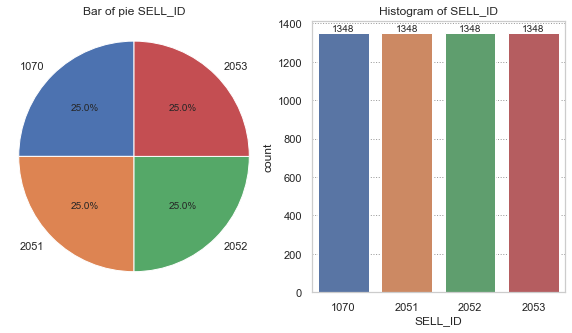

In [9]:
fig = plt.figure(figsize=(10,5))
(ax1, ax2) = fig.subplots(1, 2)
labels = merge_data.SELL_ID.unique()
sizes = [merge_data.SELL_ID[merge_data.SELL_ID == label].count()*100/len(merge_data.SELL_ID) for label in labels]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Bar of pie SELL_ID')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2 = sns.countplot(data=merge_data, x='SELL_ID')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Histogram of SELL_ID')

Quan sát biểu đồ trên, ta thấy biến bộ dữ liệu thu thập đầy đủ thông tin bán hàng của cả 4 sản phẩm của từng ngày. Như vậy những thông tin về ngày sẽ bị trùng lặp trong bộ data gộp. Để thuận tiện cho quan sát dữ liệu phía sau, ta chia tập thành 4 tập con theo từng SELL_ID.

In [4]:
burger_1070 = merge_data[merge_data['SELL_ID']==1070]
burger_2051 = merge_data[merge_data['SELL_ID']==2051]
burger_2052 = merge_data[merge_data['SELL_ID']==2052]
burger_2053 = merge_data[merge_data['SELL_ID']==2053]
burger_1070.shape
burger_2051.shape
burger_2052.shape
burger_2053.shape

(1348, 18)

(1348, 18)

(1348, 18)

(1348, 18)

### HOLIDAY

[Text(5, 0, '3'),
 Text(5, 0, '336'),
 Text(5, 0, '7'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '7'),
 Text(5, 0, '0')]

[Text(5, 0, '3'),
 Text(5, 0, '338'),
 Text(5, 0, '7'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '1'),
 Text(5, 0, '7'),
 Text(5, 0, '0')]

[Text(5, 0, '3'),
 Text(5, 0, '336'),
 Text(5, 0, '7'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '7'),
 Text(5, 0, '0')]

[Text(5, 0, '1'),
 Text(5, 0, '233'),
 Text(5, 0, '7'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '3'),
 Text(5, 0, '0'),
 Text(5, 0, '0'),
 Text(5, 0, '3')]

Text(0.5, 1.0, 'Histogram for HOLIDAY')

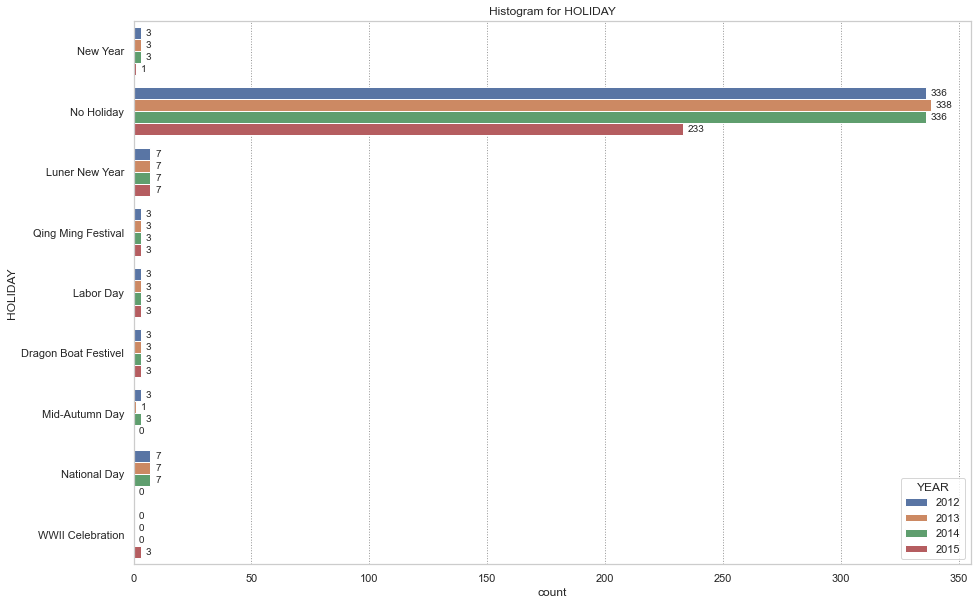

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data=burger_1070, y='HOLIDAY',hue='YEAR')
for container in ax.containers:
    ax.bar_label(container,padding=5)
ax.set_title('Histogram for HOLIDAY')

Trong 1348 ngày lấy dữ liệu, có 1243 ngày No holiday. Ta có một số nhận xét:
- Ngày New year 2015 chỉ được nghỉ 1 ngày.
- Ngày Mid-Autumn 2013 chỉ có 1 ngày do trùng với ngày National
- WWII Celebration bắt đầu có từ năm 2015 do trung quoopcs nó  mới quy định

### IS_WEEKEND

([<matplotlib.patches.Wedge at 0x2b13de42bb0>,
 [Text(-0.8597862696515174, 0.6861250400027158, '1'),
  Text(0.859786333891176, -0.6861249595037128, '0')],
 [Text(-0.46897432890082763, 0.37425002181966316, '28.6%'),
  Text(0.4689743639406414, -0.374249977911116, '71.4%')])

Text(0.5, 1.0, 'Bar of pie IS_WEEKEND')

(-1.0999988981361597,
 1.0999988939756113,
 -1.099996422826627,
 1.0999998296584108)

[Text(5, 0, '963'), Text(5, 0, '385')]

Text(0.5, 1.0, 'Histogram IS_WEEKEND')

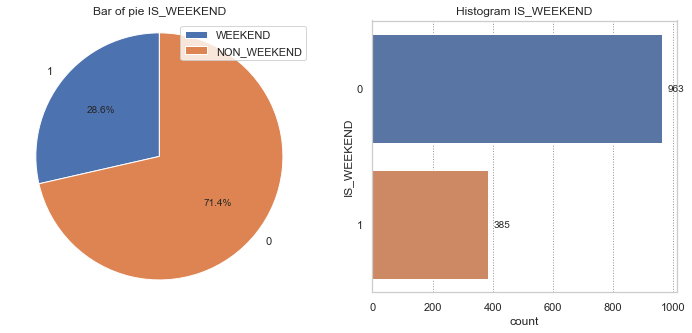

In [13]:
fig = plt.figure(figsize=(12,5))
(ax1, ax2) = fig.subplots(1, 2)
labels = burger_1070.IS_WEEKEND.unique()
sizes = [burger_1070.IS_WEEKEND[burger_1070.IS_WEEKEND == label].count()*100/len(burger_1070.IS_WEEKEND) for label in labels]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Bar of pie IS_WEEKEND')
ax1.legend(['WEEKEND','NON_WEEKEND'],loc='best')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2 = sns.countplot(data=burger_1070, y='IS_WEEKEND')
for container in ax2.containers:
    ax2.bar_label(container,padding=5)
ax2.set_title('Histogram IS_WEEKEND')

[Text(5, 0, '193'), Text(5, 0, '0')]

[Text(5, 0, '0'), Text(5, 0, '192')]

Text(0.5, 1.0, 'Histogram DAYOFWEEK')

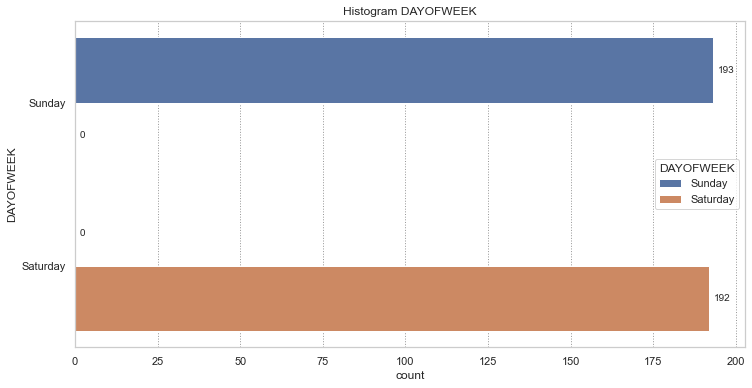

In [14]:
fig = plt.figure(figsize=(12,6))
ax2 = sns.countplot(data=burger_1070[burger_1070.IS_WEEKEND == 1], y='DAYOFWEEK',hue='DAYOFWEEK')
for container in ax2.containers:
    ax2.bar_label(container,padding=5)
ax2.set_title('Histogram DAYOFWEEK')

Biến IS_WEEKEND chỉ ngày cuối tuấn là thứ 7, chủ nhật. Check thì thấy oke đủ nhé

### IS_SCHOOLBREAK

([<matplotlib.patches.Wedge at 0x2b13deb34f0>,
 [Text(-0.8268828910339527, -0.7254410275930996, '0'),
  Text(0.8268828231132581, 0.7254411050114603, '1')],
 [Text(-0.45102703147306505, -0.3956951059598725, '72.9%'),
  Text(0.45102699442541344, 0.3956951481880692, '27.1%')])

Text(0.5, 1.0, 'Bar of pie IS_SCHOOLBREAK')

(-1.0999979454209134,
 1.099999434119904,
 -1.0999954420885796,
 1.099999782956599)

[Text(0, 0, '3932'), Text(0, 0, '1460')]

Text(0.5, 1.0, 'Histogram IS_SCHOOLBREAK')

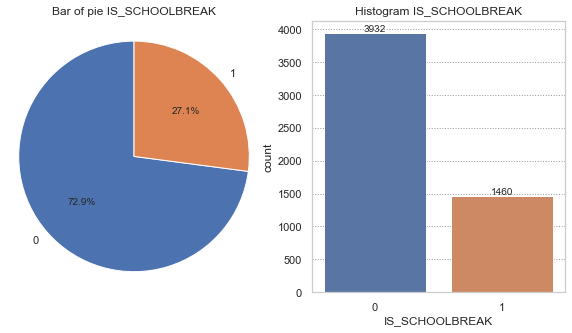

In [15]:
fig = plt.figure(figsize=(10,5))
(ax1, ax2) = fig.subplots(1, 2)
labels = merge_data.IS_SCHOOLBREAK.unique()
sizes = [merge_data.IS_SCHOOLBREAK[merge_data.IS_SCHOOLBREAK == label].count()*100/len(merge_data.IS_SCHOOLBREAK) for label in labels]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Bar of pie IS_SCHOOLBREAK')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2 = sns.countplot(data=merge_data, x='IS_SCHOOLBREAK')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Histogram IS_SCHOOLBREAK')

[Text(0, 5, '10'), Text(0, 5, '18'), Text(0, 5, '7'), Text(0, 5, '13')]

[Text(0, 5, '14'), Text(0, 5, '6'), Text(0, 5, '19'), Text(0, 5, '16')]

[Text(0, 5, '3'), Text(0, 5, '3'), Text(0, 5, '5'), Text(0, 5, '3')]

[Text(0, 5, '31'), Text(0, 5, '31'), Text(0, 5, '31'), Text(0, 5, '31')]

[Text(0, 5, '31'), Text(0, 5, '31'), Text(0, 5, '31'), Text(0, 5, '31')]

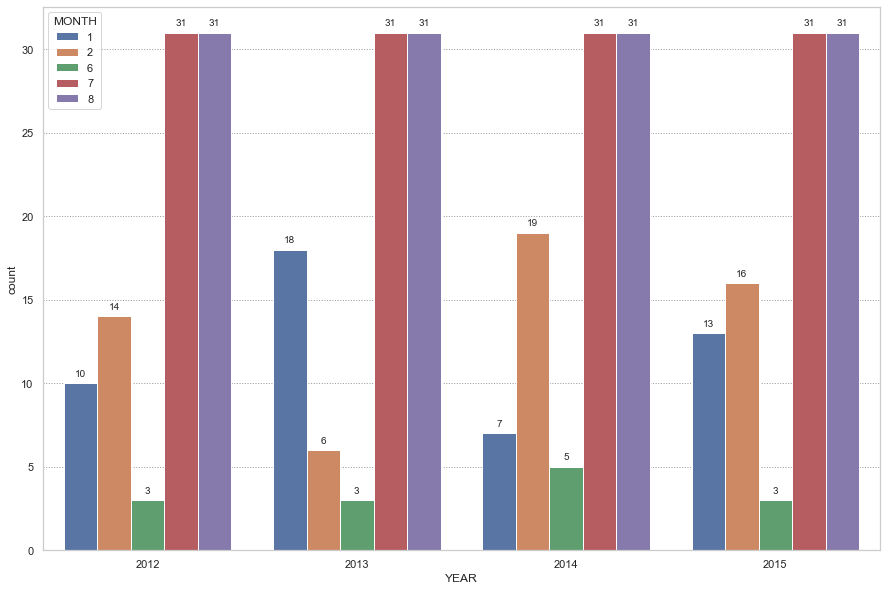

In [16]:
fig,ax2 = plt.subplots(figsize=(15,10))
df = burger_1070[burger_1070.IS_SCHOOLBREAK == 1]
ax2 = sns.countplot(data=df, hue='MONTH',x='YEAR')
for container in ax2.containers:
    ax2.bar_label(container,padding=5)

Học sinh nghỉ học vào tháng 1,2,6,7,8. Quan sát thấy ngày nghỉ học là vào lễ tết âm lịch vào tháng 1,2 và ngày nghỉ hè tháng 6, 7, 8. Có ngày 15/6 với 16/6 hằng năm được nghỉ học mà mình k rõ lí do gì

### IS_OUTDOOR

([<matplotlib.patches.Wedge at 0x2b13e3c8550>,
 [Text(-0.4620384465577412, 0.998258720924846, '0'),
  Text(0.46203844655774146, -0.9982587209248458, '1')],
 [Text(-0.25202097084967695, 0.5445047568680977, '13.8%'),
  Text(0.2520209708496771, -0.5445047568680976, '86.2%')])

Text(0.5, 1.0, 'Bar of pie IS_OUTDOOR')

(-1.0999999880207774,
 1.0999998485041802,
 -1.0999998982776953,
 1.0999999951560808)

[Text(0, 0, '744'), Text(0, 0, '4648')]

Text(0.5, 1.0, 'Histogram IS_OUTDOOR')

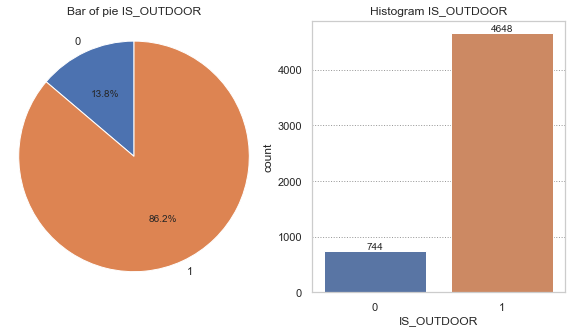

In [17]:
fig = plt.figure(figsize=(10,5))
(ax1, ax2) = fig.subplots(1, 2)
labels = merge_data.IS_OUTDOOR.unique()
sizes = [merge_data.IS_OUTDOOR[merge_data.IS_OUTDOOR == label].count()*100/len(merge_data.IS_OUTDOOR) for label in labels]
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Bar of pie IS_OUTDOOR')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2 = sns.countplot(data=merge_data, x='IS_OUTDOOR')
ax2.bar_label(ax2.containers[0])
ax2.set_title('Histogram IS_OUTDOOR')

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE', ylabel='count'>

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '16'),
 Text(0, 0, '23'),
 Text(0, 0, '28'),
 Text(0, 0, '33'),
 Text(0, 0, '39'),
 Text(0, 0, '22'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

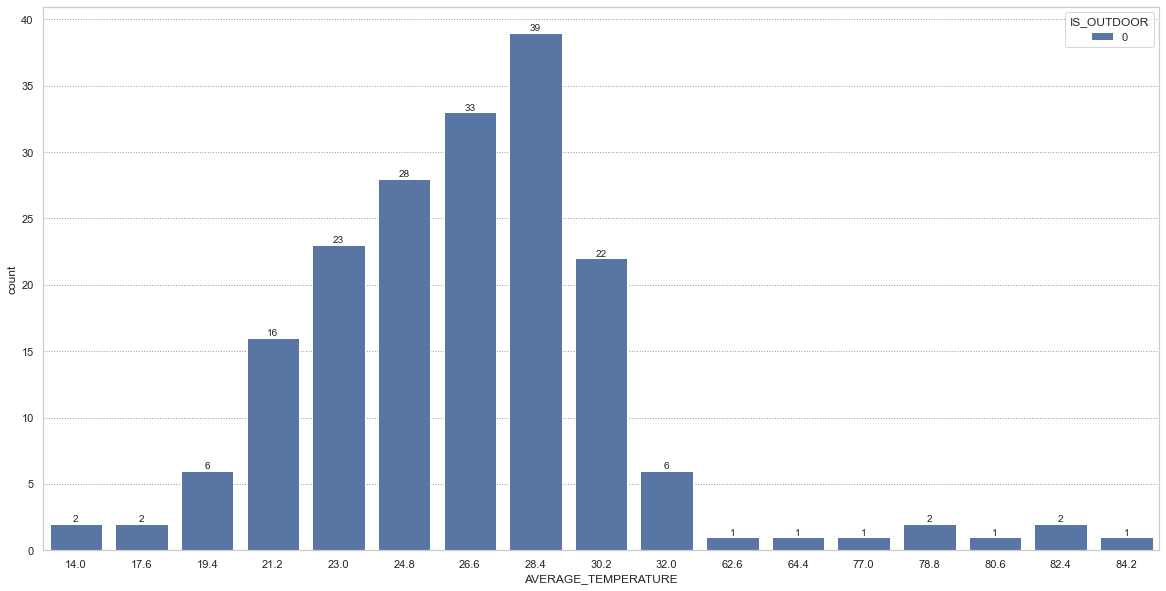

In [5]:
fig,ax2 = plt.subplots(figsize=(20,10))
sns.countplot(data=burger_1070[(burger_1070.IS_OUTDOOR == 0)], x = 'AVERAGE_TEMPERATURE',hue='IS_OUTDOOR')
ax2.bar_label(ax2.containers[0])

Đa phần những ngày ở nhà là nhiệt độ dưới 32 độ F

### AVERAGE_TEMPERATURE

<AxesSubplot:xlabel='AVERAGE_TEMPERATURE', ylabel='Count'>

[Text(0, 0, '')]

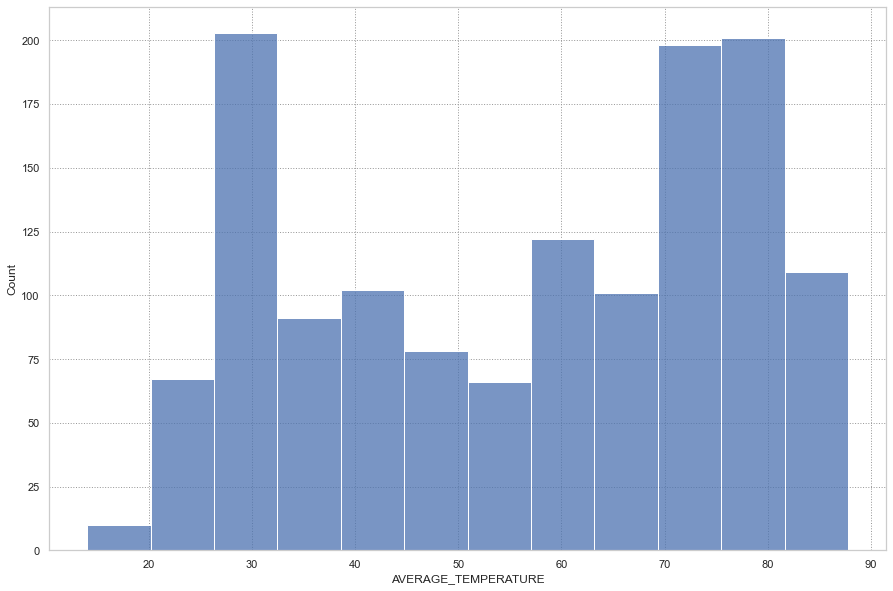

In [6]:
fig,ax2 = plt.subplots(figsize=(15,10))
sns.histplot(data=merge_data.AVERAGE_TEMPERATURE[merge_data.SELL_ID == 1070])
ax2.bar_label(ax2.containers[0])

### QUANTITY

<AxesSubplot: xlabel='Count', ylabel='QUANTITY'>

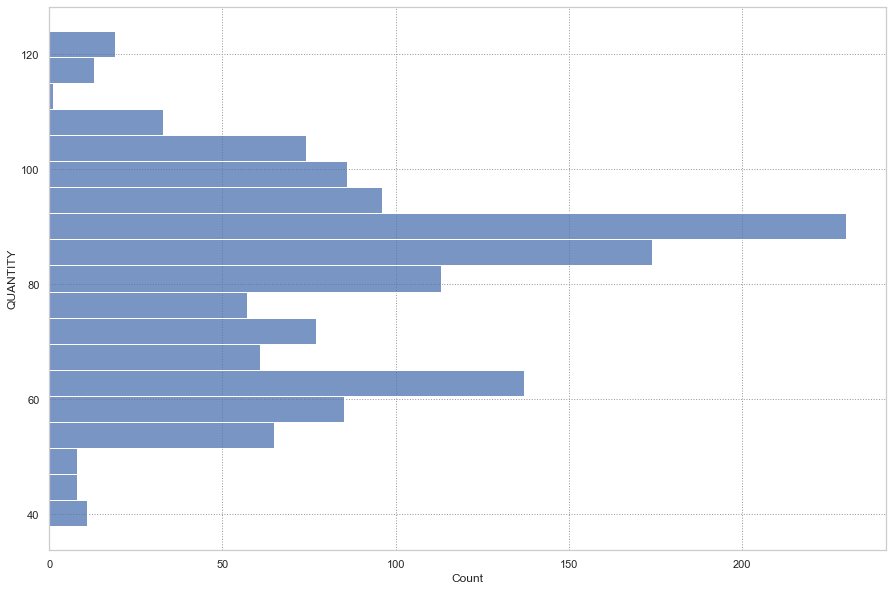

In [54]:
fig,ax2 = plt.subplots(figsize=(15,10))
sns.histplot(data = burger_1070, y ='QUANTITY')

### PRICE

<AxesSubplot: xlabel='Count', ylabel='PRICE'>

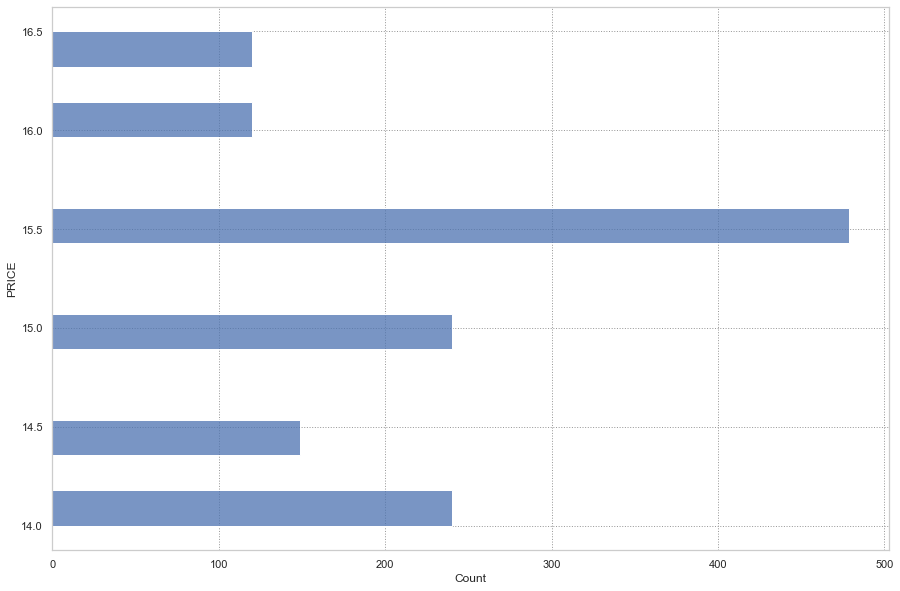

In [35]:
fig,ax2 = plt.subplots(figsize=(15,10))
sns.histplot(data = burger_1070, y ='PRICE')

## **Bi-variate Analysis**

In [4]:
burger_1070 = merge_data[merge_data['SELL_ID'] == 1070]
burger_2051 = merge_data[merge_data['SELL_ID'] == 2051]
burger_2052 = merge_data[merge_data['SELL_ID'] == 2052]
burger_2053 = merge_data[merge_data['SELL_ID'] == 2053]

<AxesSubplot: >

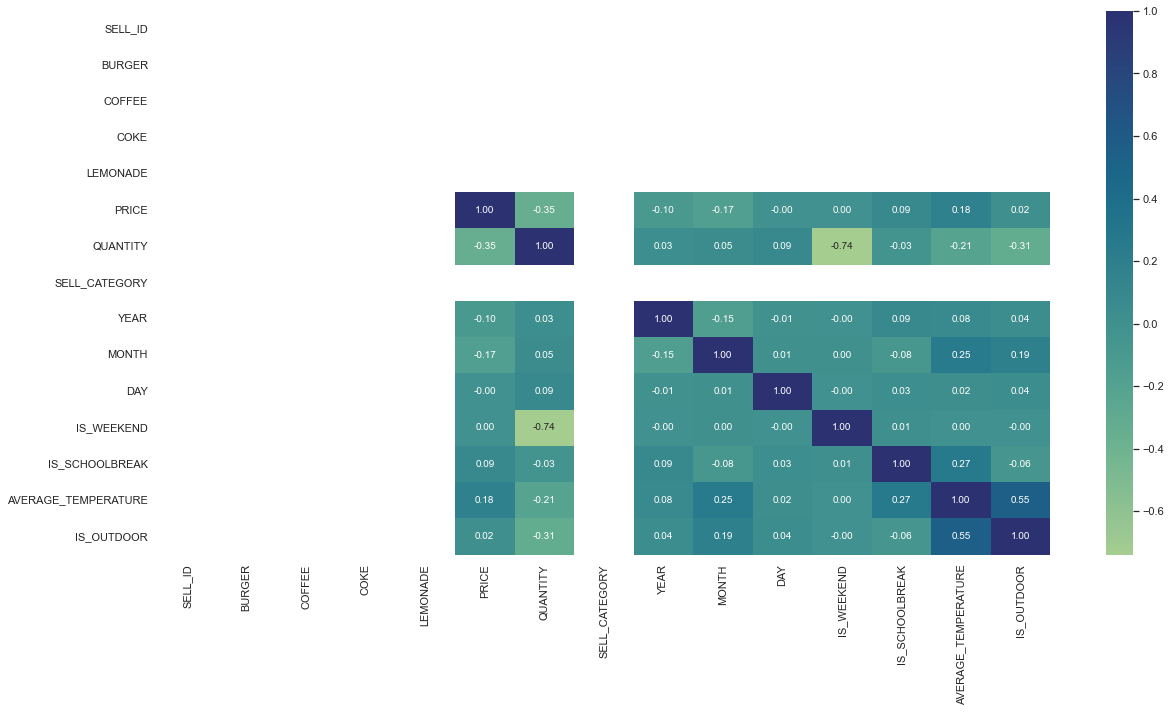

In [50]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(burger_1070.corr(),cmap="crest", annot=True, fmt=".2f")

Nhìn biểu đồ tương quan trên, ta thấy biến mục tiêu của ta là QUANTITY có tương quan với PRICE còn bị ảnh hưởng bởi các biến IS_WEEKEND, AVERAGE_TEMPERATURE, IS_OUTDOOR. Việc này sẽ tạo ra những giá trị ngoại lai với mô hình tuyến tính của chúng ta. Vì vậy, sau đây tui sẽ nghiên cứu xem nó tương quan như thế nào và xử lí các bước tiếp theo nhé.

### *PRICE và QUANTITY*

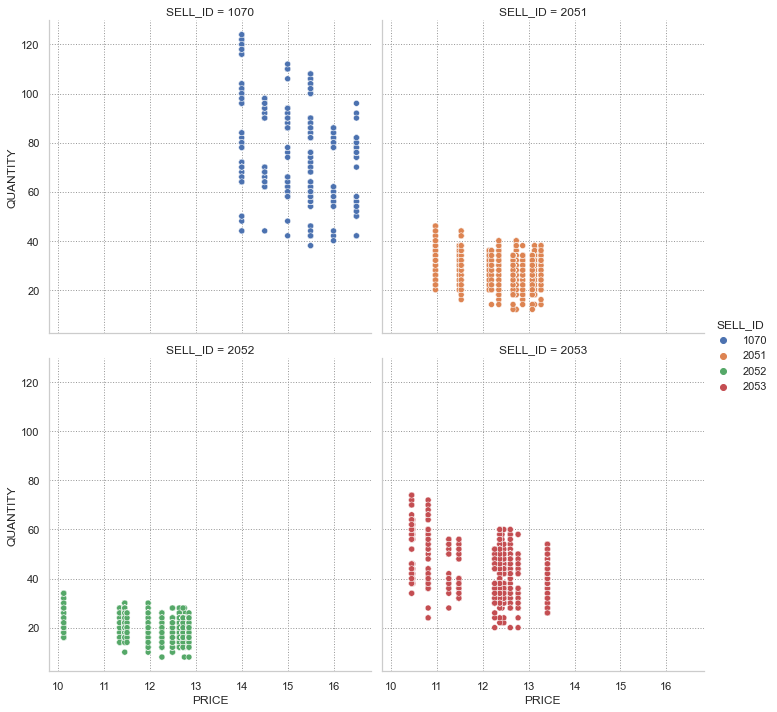

In [41]:
sns.relplot(data=merge_data, y="QUANTITY", x="PRICE", col="SELL_ID",hue='SELL_ID',col_wrap=2, palette="deep")

<Figure size 864x360 with 0 Axes>

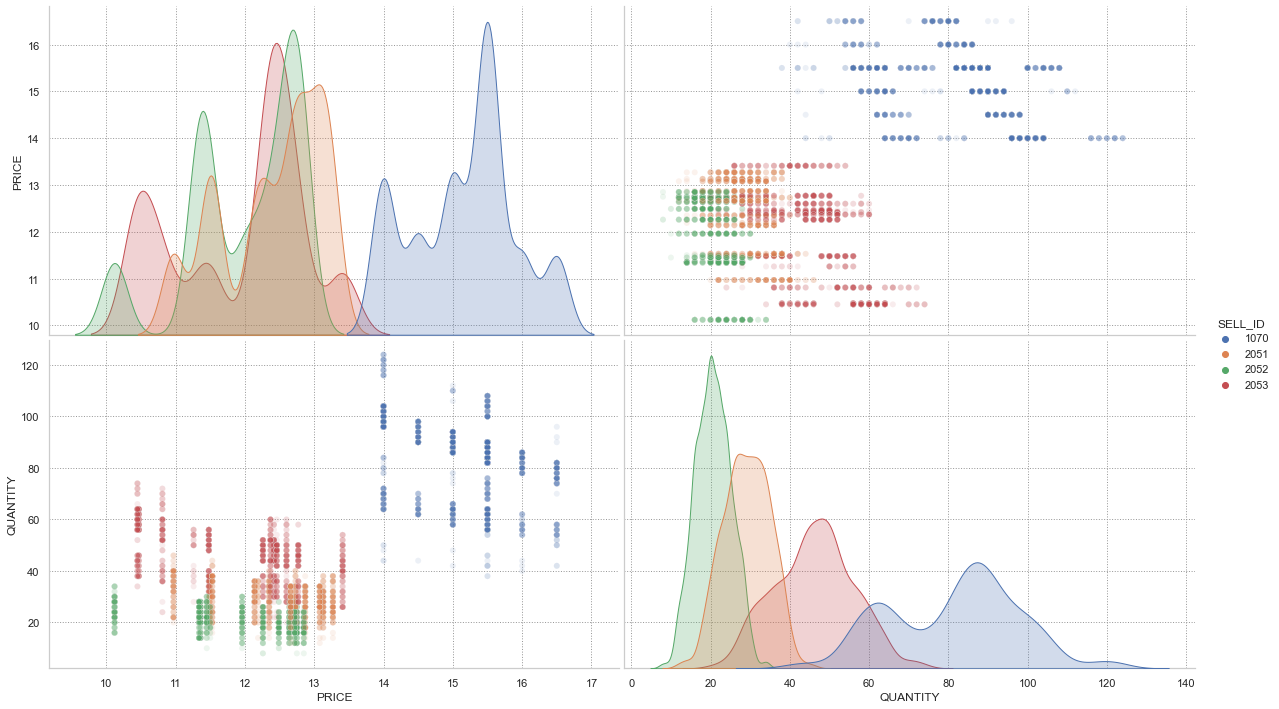

In [53]:
fig = plt.figure(figsize=(12,5))
ax2 = sns.pairplot(merge_data[['PRICE','QUANTITY','SELL_ID']], hue = 'SELL_ID', plot_kws={'alpha':0.1}, palette="deep", size=5, aspect=1.7)

### *IS_WEEKEND and QUANTITY*

[Text(0, 10, '89.1381'),
 Text(0, 10, '31.4912'),
 Text(0, 10, '22.1537'),
 Text(0, 10, '50.3406')]

[Text(0, 10, '62.3221'),
 Text(0, 10, '23.0078'),
 Text(0, 10, '16.9039'),
 Text(0, 10, '35.6519')]

Text(0.5, 1.0, 'Bar of IS_WEEKEND and QUANTITY')

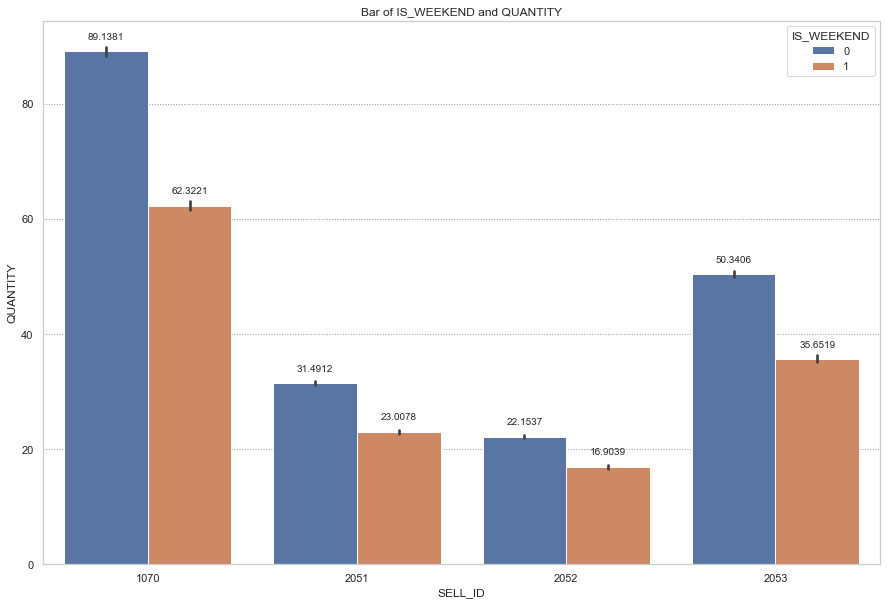

In [19]:
fig,ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.barplot(data=merge_data, x='SELL_ID', y='QUANTITY', hue='IS_WEEKEND')
for container in ax1.containers:
    ax1.bar_label(container,padding=10)
ax1.set_title('Bar of IS_WEEKEND and QUANTITY')

[Text(0, 10, '15.1667'),
 Text(0, 10, '12.3776'),
 Text(0, 10, '11.983'),
 Text(0, 10, '11.9373')]

[Text(0, 10, '15.1675'),
 Text(0, 10, '12.3822'),
 Text(0, 10, '11.9844'),
 Text(0, 10, '11.9416')]

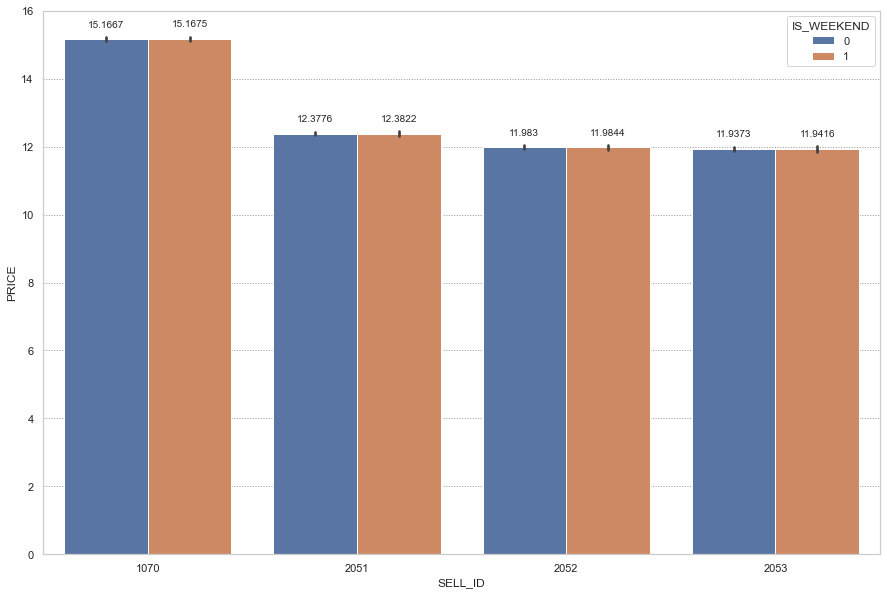

In [55]:
fig,ax2 = plt.subplots(figsize=(15,10))
ax2 = sns.barplot(data=merge_data, x='SELL_ID', y='PRICE', hue='IS_WEEKEND')
for container in ax2.containers:
    ax2.bar_label(container,padding=10)

Theo biểu đồ trên, ta thấy vào những ngày cuối tuần số lượng bán hàng bị giảm đi rất nhiều 
- 30% đối với mã 1070
- 27% đối với mã 2051
- 23.7% đối với mã 2052
- 29.2% đối với mã 2053

Như vậy ta sẽ chỉ lấy dữ liệu không phải ngày cuối tuần tức là IS_WEEKEND = 0

### *IS_OUTDOOR và QUANTITY*

[Text(0, 10, '94.3656'),
 Text(0, 10, '31.9247'),
 Text(0, 10, '23.0215'),
 Text(0, 10, '51.4516')]

[Text(0, 10, '79.4165'),
 Text(0, 10, '28.611'),
 Text(0, 10, '20.2754'),
 Text(0, 10, '45.296')]

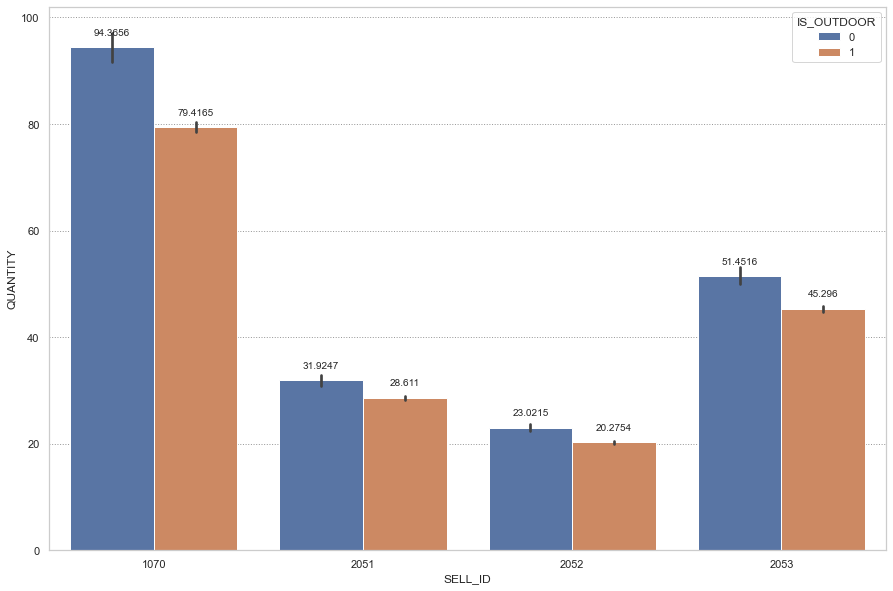

In [26]:
fig,ax2 = plt.subplots(figsize=(15,10))
ax1 = sns.barplot(data=merge_data, x='SELL_ID', y='QUANTITY', hue='IS_OUTDOOR')
for container in ax1.containers:
    ax1.bar_label(container,padding=10)

[Text(0, 10, '15.129'),
 Text(0, 10, '12.6192'),
 Text(0, 10, '12.0574'),
 Text(0, 10, '12.2526')]

[Text(0, 10, '15.173'),
 Text(0, 10, '12.3404'),
 Text(0, 10, '11.9716'),
 Text(0, 10, '11.8883')]

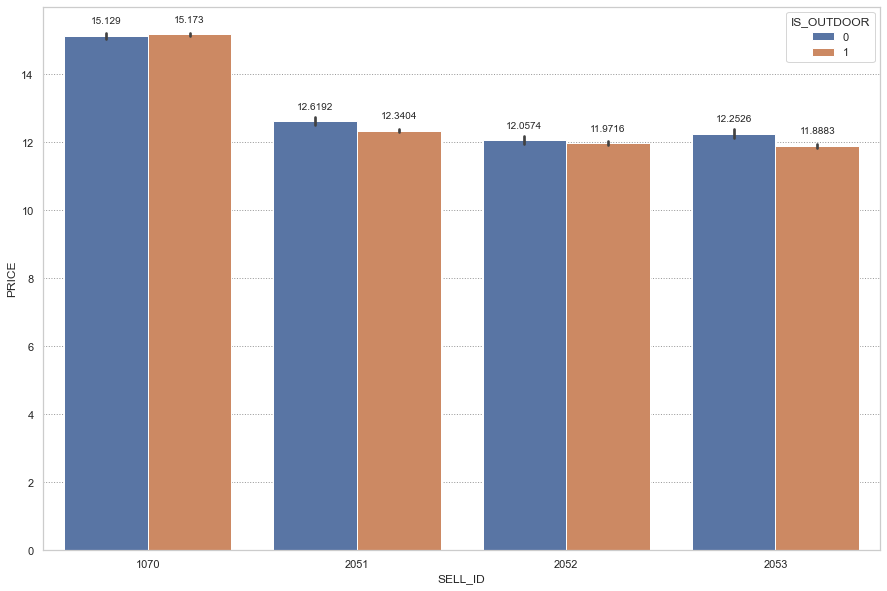

In [28]:
fig,ax2 = plt.subplots(figsize=(15,10))
ax2 = sns.barplot(data=merge_data, x='SELL_ID', y='PRICE', hue='IS_OUTDOOR')
for container in ax2.containers:
    ax2.bar_label(container,padding=10)

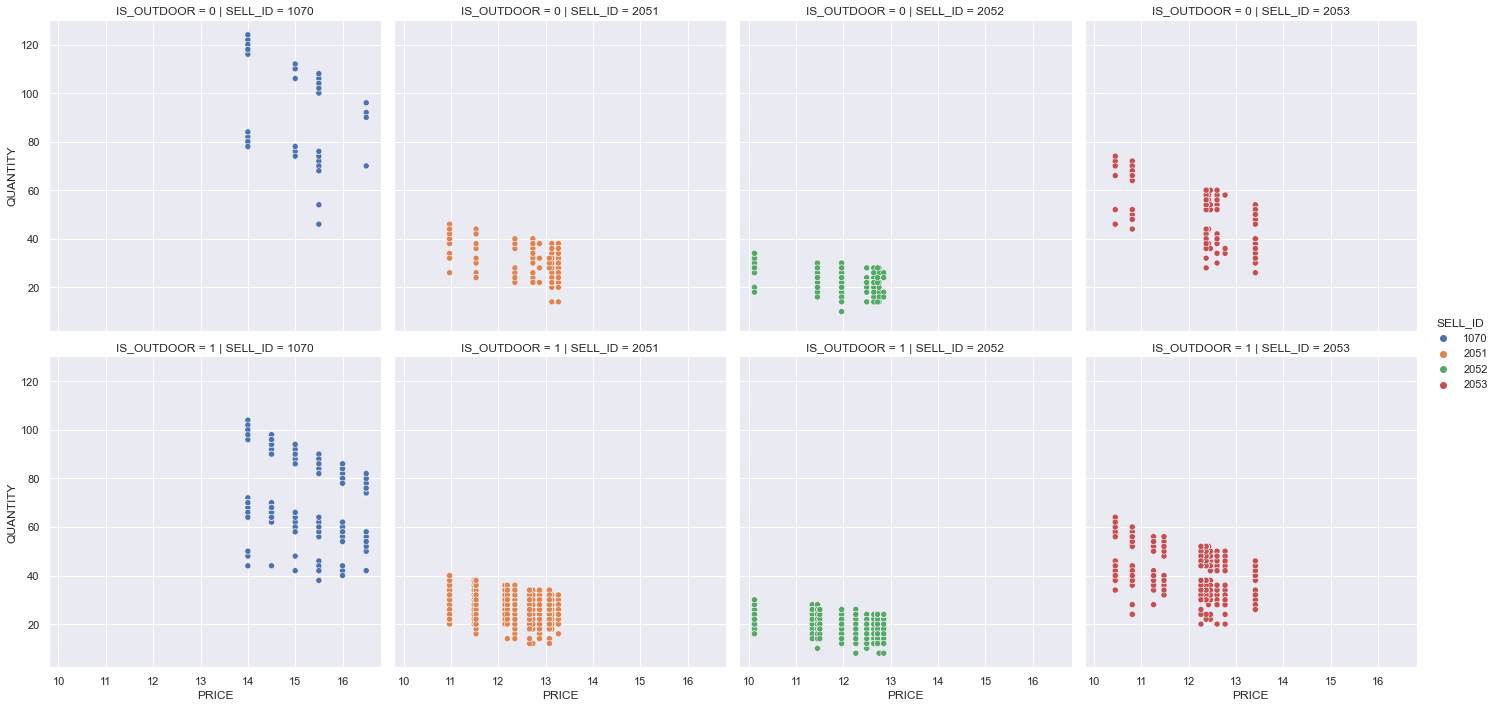

In [129]:
sns.relplot(data=merge_data, y="QUANTITY", x="PRICE", col="SELL_ID", row='IS_OUTDOOR',hue='SELL_ID', palette="deep")

Ta có nhận xét rằng những ngày k thể ra ngoài tức là IS_OUTDOOR = 0 số lượng bán ra sẽ cao hơn. Vì cửa hàng nằm trong tòa nhà nên những ngày nhiệt độ thấp hoặc vì lí do nào đó k thể ra ngoài sẽ có nhiều người dùng burger coffe hơn

### *AVERAGE_TEMPERATURE và QUANTITY*

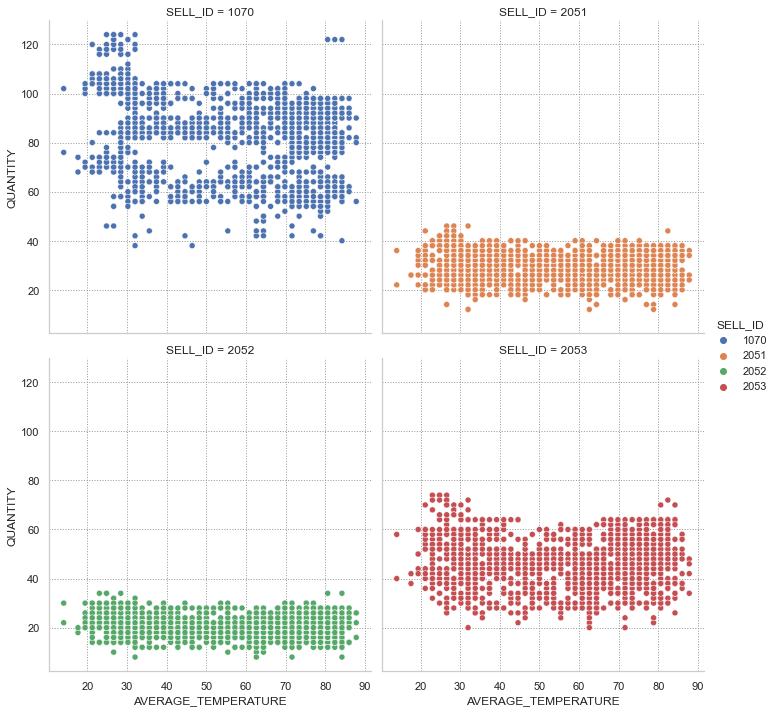

In [29]:
sns.relplot(data=merge_data,x='AVERAGE_TEMPERATURE',y='QUANTITY',col='SELL_ID',col_wrap=2,hue='SELL_ID',palette="deep")

### *IS_SCHOOLBREAK và QUANTITY*

[Text(0, 10, '81.7436'),
 Text(0, 10, '28.9502'),
 Text(0, 10, '20.59'),
 Text(0, 10, '45.8962')]

[Text(0, 10, '80.7671'),
 Text(0, 10, '29.3863'),
 Text(0, 10, '20.8274'),
 Text(0, 10, '46.8164')]

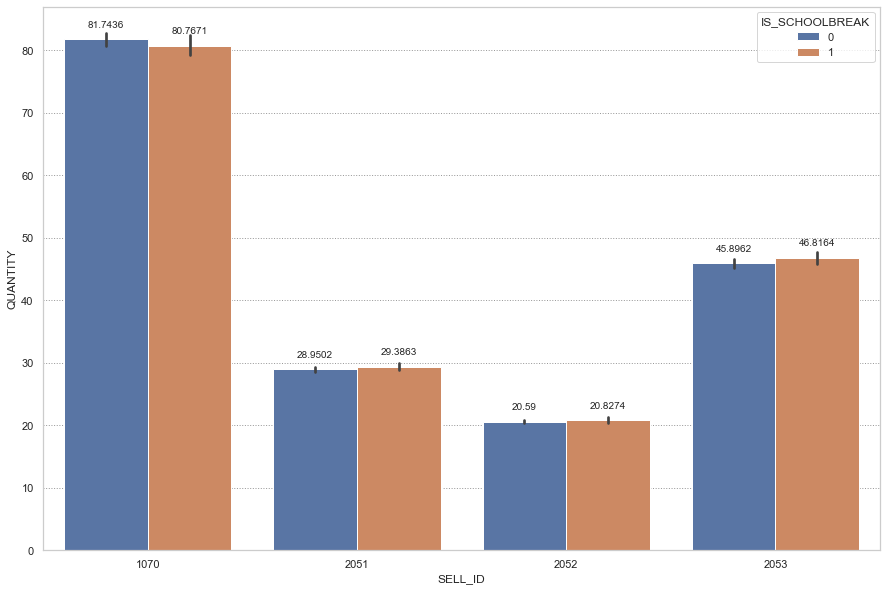

In [68]:
fig,ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.barplot(data=merge_data, hue='IS_SCHOOLBREAK', y='QUANTITY', x='SELL_ID')
for container in ax1.containers:
    ax1.bar_label(container,padding=10)

### HOLIDAY

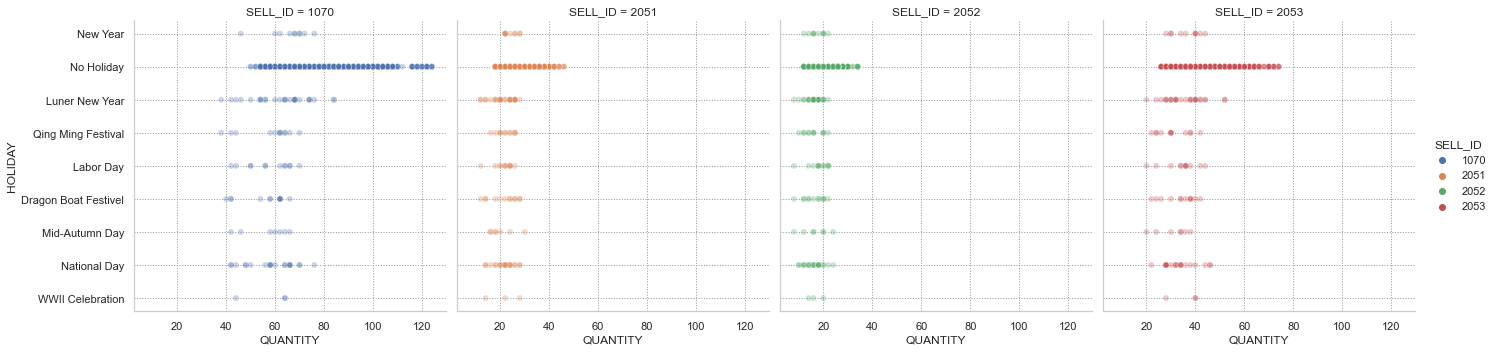

In [31]:
sns.relplot(data = merge_data, y = merge_data.HOLIDAY, x = merge_data.QUANTITY , hue = 'SELL_ID', palette="deep", alpha=0.3, col='SELL_ID')

Ta thấy số lượng bán hàng ở những ngày lễ là thấp hơn Tuy nhiên có thể thấy những lễ này chiếm tỉ trọng rất nhỏ, vì vậy có thể xem xét bỏ đi những ngày này trong mô hình của chúng ta.

## **Outlier treatment**

Để xây dựng mô hình hồi quy được chính xác, chúng ta loại bỏ các yếu tố khác ảnh hưởng đến số lượng để loại bỏ các giá trị ngoại biên.

Tiến hành xây dựng bộ data mới:
- Chọn HOLIDAY = 'No Holiday'
- Chọn IS_WEEKEND = 0
- Chọn IS_OUTDOOR = 1
- Chọn IS_SCHOOLBREAK = 0

In [5]:
bau_data = merge_data[(merge_data['HOLIDAY'] =='No Holiday') & (merge_data['IS_WEEKEND'] == 0) & (merge_data['IS_OUTDOOR'] == 1) & (merge_data['IS_SCHOOLBREAK'] == 0)]

In [6]:
merge_data.shape
bau_data.shape

(5392, 18)

(2268, 18)

In [7]:
burger_1070_bau = bau_data[bau_data['SELL_ID'] == 1070]
burger_2051_bau = bau_data[bau_data['SELL_ID'] == 2051]
burger_2052_bau = bau_data[bau_data['SELL_ID'] == 2052]
burger_2053_bau = bau_data[bau_data['SELL_ID'] == 2053]

price => quantity

y = f(x)

Train set data 80% => Huấn luyện mô hình => tạo ra model, tức là tìm hàm f(x)
test set data 20% => Đánh giá mô hình

# **Xây dựng mô hình hồi quy**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

## **Với data merge**

LinearRegression()

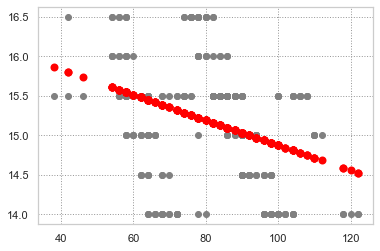

Mean Absolute Error: 0.5863435600057256
Mean Squared Error: 0.5091405578186061
Root Mean Squared Error: 0.713540859249564
0.1183189717861286


In [93]:
X_train, X_test, y_train, y_test = train_test_split(burger_1070_merge['QUANTITY'], burger_1070_merge['PRICE'], test_size=0.2, random_state=41)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test,y_pred))

Ta thấy với data ban đầu, có nhiều giá trị ngoại lai, vì vậy mô hình hồi quy tuyến tính có cho kết quả rất thấp. Bởi vì tính hạn chế với những dữ liệu ngoại lai của mô hình tuyến tình

Ta sẽ thử với mô hình những mô hình tree model khác để xem kết quả có tốt hơn không

RandomForestRegressor()

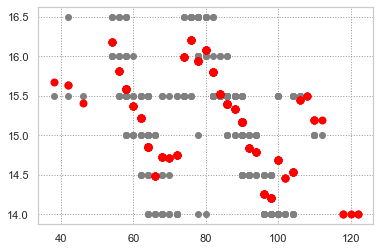

Mean Absolute Error: 0.3776268141509815
Mean Squared Error: 0.22697115632578993
Root Mean Squared Error: 0.47641489935327375
R2: 0.6069530124616195


In [94]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

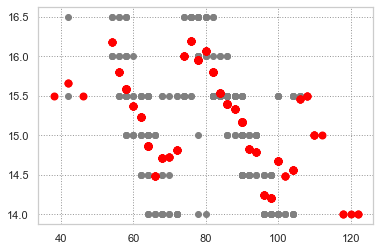

Mean Absolute Error: 0.37370110617743596
Mean Squared Error: 0.227102757987844
Root Mean Squared Error: 0.47655299599083834
R2: 0.6067251172626755


In [95]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

Rõ ràng kết quả đã được cải thiệt đáng kể, những điểm dữ liệu ngoại lai cũng được mô hình học tập đáng kể, tuy nhiên nó vẫn rất xấu và không tốt một chút nào

## **Với data bau**

Chúng ta sẽ thử xem xét với bộ data đã loại bỏ những dữ liệu ngoại lai để có so sánh và nhận xét

In [64]:
X_train, X_test, y_train, y_test = train_test_split(burger_1070_bau['PRICE'],burger_1070_bau['QUANTITY'], test_size=0.2, random_state = 41)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

LinearRegression()

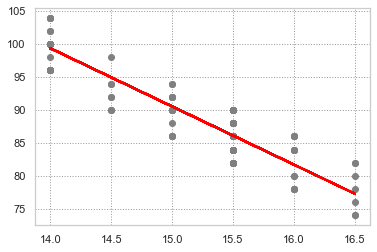

Mean Absolute Error: 2.5251842360261136
Mean Squared Error: 8.52025773647781
Root Mean Squared Error: 2.918948053062577
R2: 0.8174579628891954


In [66]:
linear_model = LinearRegression() # Gọi cái thư viện LinearRegression
linear_model.fit(X_train, y_train) # huấn luyện mô hình
y_pred = linear_model.predict(X_test) # 
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

Rất rõ ràng để nhận thấy mô hình tuyến tính có kết quả rất tốt. Dữ liệu gần như tuyến tình và khớp với mô hình. Các chỉ số đánh giá mô hình cũng rất tốt

DecisionTreeRegressor(max_depth=10)

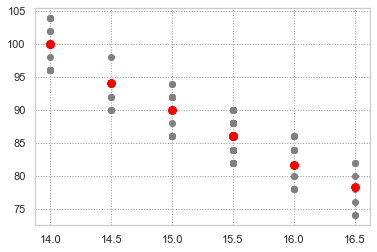

Mean Absolute Error: 2.425671580984391
Mean Squared Error: 8.242539962109174
Root Mean Squared Error: 2.8709824036571825
R2: 0.8234079200199624


In [67]:
decisionTree = DecisionTreeRegressor(max_depth=10)
decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

RandomForestRegressor()

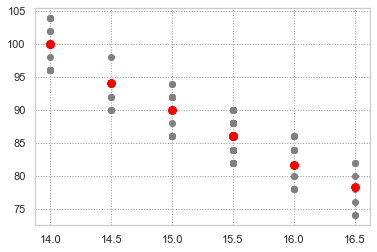

Mean Absolute Error: 2.426018709500744
Mean Squared Error: 8.253118255985664
Root Mean Squared Error: 2.872824090679007
R2: 0.823181285641861


In [72]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

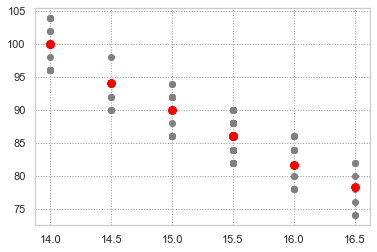

Mean Absolute Error: 2.42567497387267
Mean Squared Error: 8.242542225542772
Root Mean Squared Error: 2.8709827978486344
R2: 0.823407871527089


In [71]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

Như vậy mô hình hồi quy tuyến tính cho kết quả rất tốt và đường nhạy cảm về giá được xác định

## **Data full**

Ngoài ra, tôi muốn thử xét thêm các yếu tố ngoài PRICE vào để dự đoán QUANTITY với mong muốn tìm được mức giá tối ưu trong mọi điều kiện mà không cần xét riêng với các trường hợp đặc biệt

In [73]:
X_train, X_test, y_train, y_test = train_test_split(burger_1070[['PRICE','IS_OUTDOOR','IS_WEEKEND','IS_SCHOOLBREAK']], burger_1070['QUANTITY'], test_size=0.2, random_state = 41)
X_train = X_train.values.reshape(-1, 4)
X_test = X_test.values.reshape(-1, 4)

In [74]:
decisionTree = DecisionTreeRegressor(max_depth=10)
decisionTree.fit(X_train, y_train)
y_pred = decisionTree.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

DecisionTreeRegressor(max_depth=10)

Mean Absolute Error: 4.589711759403024
Mean Squared Error: 57.84564625595396
Root Mean Squared Error: 7.6056325349016145
R2: 0.7894003267327447


In [76]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

RandomForestRegressor()

Mean Absolute Error: 4.600765532177865
Mean Squared Error: 57.89678311297277
Root Mean Squared Error: 7.608993567678499
R2: 0.7892141518677874


In [77]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Mean Absolute Error: 4.589670379073532
Mean Squared Error: 57.84541751952099
Root Mean Squared Error: 7.605617497581704
R2: 0.789401159497545


Rõ ràng kết quả mô hình vẫn khá ổn, điều này cho thấy sức mạnh của các thuật toán trên với dữ liệu 

## **Modeling**

Trong mục tiêu xây dựng đường nhạy cảm về giá của sản phẩm, chúng tôi sẽ sử dụng mô hình hồi quy tuyến tính với dữ liệu đã loại bỏ ngoại lai.
Ta sẽ xét riêng từng sản phẩm theo SELL_ID

Những ngày là holiday, ngày cuối tuần, ngày nghỉ học, ngày có thể không ra ngoài sẽ được xét riêng

In [8]:
burger_1070_bau.head()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY,YEAR,MONTH,DAY,DAYOFWEEK,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
12,1070,1,0,0,0,2012-01-04,15.5,88,0,2012,1,4,Wednesday,No Holiday,0,0,32.0,1
180,1070,1,0,0,0,2012-02-15,15.5,86,0,2012,2,15,Wednesday,No Holiday,0,0,32.0,1
184,1070,1,0,0,0,2012-02-16,15.5,86,0,2012,2,16,Thursday,No Holiday,0,0,32.0,1
188,1070,1,0,0,0,2012-02-17,15.5,84,0,2012,2,17,Friday,No Holiday,0,0,32.0,1
200,1070,1,0,0,0,2012-02-20,15.5,88,0,2012,2,20,Monday,No Holiday,0,0,37.4,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(burger_1070_bau.PRICE, burger_1070_bau.QUANTITY, test_size=0.2, random_state = 41)
X_train = X_train.values.reshape(-1, 1) 
X_test = X_test.values.reshape(-1, 1) 

NameError: name 'train_test_split' is not defined

In [26]:
X_train.shape
X_train1 = X_train.values.reshape(-1, 1)


(453,)

In [12]:
def create_model_and_find_elasticity(data):
    X_train, X_test, y_train, y_test = train_test_split(data.PRICE, data.QUANTITY, test_size=0.2, random_state = 41)
    X_train = X_train.values.reshape(-1, 1) 
    X_test = X_test.values.reshape(-1, 1)  # Cái này để reshape về dạng (,1). -1 tức là cho nó tùy ý
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    plt.scatter(X_test, y_test,  color='gray')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:', metrics.r2_score(y_test,y_pred))
    return linear_model
    

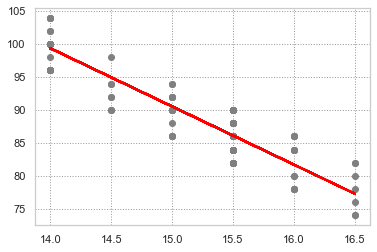

Mean Absolute Error: 2.5251842360261136
Mean Squared Error: 8.52025773647781
Root Mean Squared Error: 2.918948053062577
R2: 0.8174579628891954


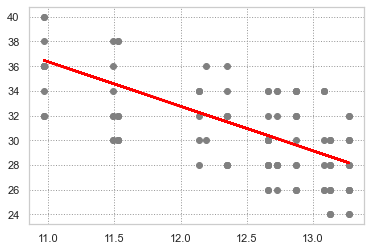

Mean Absolute Error: 2.563016881769942
Mean Squared Error: 8.746871865514164
Root Mean Squared Error: 2.9575110930500608
R2: 0.36994597736269763


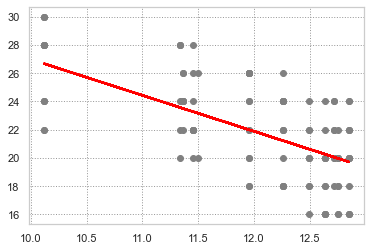

Mean Absolute Error: 2.312196057985642
Mean Squared Error: 7.455753293904549
Root Mean Squared Error: 2.7305225312940653
R2: 0.41450360254523755


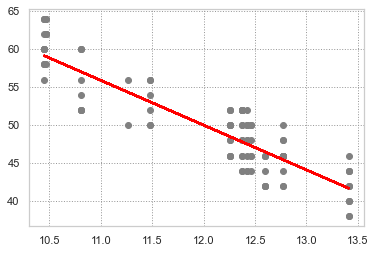

Mean Absolute Error: 2.4437248518766466
Mean Squared Error: 8.120081348050936
Root Mean Squared Error: 2.8495756435039477
R2: 0.8111636022030256


In [13]:
linear_model_1070 = create_model_and_find_elasticity(burger_1070_bau)
linear_model_2051 = create_model_and_find_elasticity(burger_2051_bau)
linear_model_2052 = create_model_and_find_elasticity(burger_2052_bau)
linear_model_2053 = create_model_and_find_elasticity(burger_2053_bau)

Với những đường nhạy cảm với giá là đường thẳng (q(QUANTITY) = a.p(PRICE) + b), ta tính được độ nhạy cảm về giá (EpD) ở từng điểm giá trị trên đường thẳng

<img style="text-align: center;" src="./static/images/elastic-linear-1.PNG" width="500" height="400">

Dưới đây là trình bày về tính được chỉ số EpD đối với đường tuyến tính:

<img style="text-align: center;" src="./static/images/explain-about-elastic-linear.jpg" width="700" height="1000">

Với giá trị a theo từng mô hình như sau

In [46]:
print('Phương trinh tuyến tính của linear_model_1070 : q = {a:.2f}*p + {b:.2f}'.format( a=linear_model_1070.coef_[0], b=linear_model_1070.intercept_))
print('Phương trinh tuyến tính của linear_model_2051 : q = {a:.2f}*p + {b:.2f}'.format( a=linear_model_2051.coef_[0], b=linear_model_2051.intercept_))
print('Phương trinh tuyến tính của linear_model_2052 : q = {a:.2f}*p + {b:.2f}'.format( a=linear_model_2052.coef_[0], b=linear_model_2052.intercept_))
print('Phương trinh tuyến tính của linear_model_2053 : q = {a:.2f}*p + {b:.2f}'.format( a=linear_model_2053.coef_[0], b=linear_model_2053.intercept_))

Phương trinh tuyến tính của linear_model_1070 : q = -8.83*p + 222.93
Phương trinh tuyến tính của linear_model_2051 : q = -3.60*p + 75.93
Phương trinh tuyến tính của linear_model_2052 : q = -2.55*p + 52.43
Phương trinh tuyến tính của linear_model_2053 : q = -5.89*p + 120.67


# **Tìm giá tối ưu**

$$coke data.PROFIT = (coke data.PRICE - buying price coke) * coke data.QUANTITY$$

In [14]:
bau_data.PRICE.min()
bau_data.PRICE.max()

10.12

16.5

In [34]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price, 0.1)
    test['QUANTITY'] = model.predict(test.PRICE.values.reshape(-1, 1))
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    values_at_max_profit["SELL_ID"] = set(data['SELL_ID'])
    return values_at_max_profit

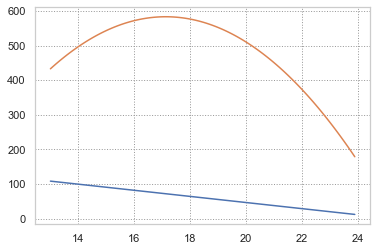

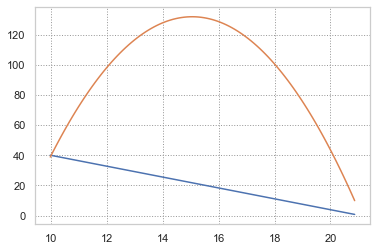

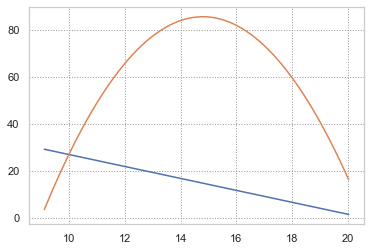

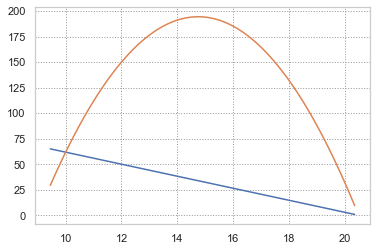

In [35]:
buying_price = 9
optimal_price_1070 = find_optimal_price(burger_1070_bau, linear_model_1070, buying_price)
optimal_price_2051 = find_optimal_price(burger_2051_bau, linear_model_2051, buying_price)
optimal_price_2052 = find_optimal_price(burger_2052_bau, linear_model_2052, buying_price)
optimal_price_2053 = find_optimal_price(burger_2053_bau, linear_model_2053, buying_price)
optimal_price = pd.concat([optimal_price_1070, optimal_price_2051, optimal_price_2052, optimal_price_2053])

In [36]:
optimal_price

,PRICE,QUANTITY,PROFIT,SELL_ID
41,17.10,72.009121,583.273877,1070
51,15.07,21.709520,131.776784,2051
57,14.82,14.711060,85.618366,2052
53,14.75,33.810555,194.410693,2053


# **Kết luận**

Với bài toán đặt ra tìm giá tối ưu dựa và mối quan hệ của giá bán và số lượng bán hàng của sản phẩm bán lẻ, chúng tôi dựa vào lí thuyết về độ co giãn về giá để tìm giá tối ưu với giá vốn mua vào xác định. Mô hình học máy được sử dụng để tuyến tính hóa dữ liệu lịch sử bán hàng của giá bán và số lượng bán hàng thu thập trong gần 1350 ngày của sản phẩm burger. Mô hình LinearRegression được sử dụng đề tìm ra đường nhạy cảm về giá của sản phẩm. Bên cạnh đó chúng tôi nghiên cứu các dữ liệu liên quan về combo và dữ liệu mở rộng của ngày bán hàng, bao gồm CALENDAR_DATE, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR. Từ đó có nhận xét và loại bỏ những giá trị ngoại lai trong dữ liệu khi xây dựng mô hình hồi quy tuyến tính bằng cách chọn các giá trị về dữ liệu mở rộng phổ biến hơn. Bên cạnh đó chúng tôi cố gắng xây dựng mô hình hồi quy khi xét thêm các biến mở rộng trên bằng các mô hình học máy tối ưu hơn có dữ liệu dạng bảng có nhiều điểm ngoại lai như là XGBoost, RandomForest. Qua việc thử nghiệm các mô hình học máy khác nhau với các bộ dữ liệu được xử lí khác nhau, chúng tôi tiến hành đánh giá thông qua các metris MAE, MSE, RMSE, R2 cho kết quả rất tốt.

Tuy nhiên kết quả như vậy là chưa hoàn toàn thuyết phục cũng như áp dụng được vào thực tết, để phát triển thêm về chất lượng cũng như tính năng của mô hình cần lượng dữ liệu nhiều và tốt hơn nữa. Với dữ liệu mang tính thử nghiệm như trên, chúng tôi cố gắng trình bày rõ ràng cách tiến hành phân tích dữ liệu và xây dựng mô hình để làm cơ sở, tiền đề cho việc nghiên cứu phát triển sau này.

Xin cảm ơn các bạn đã theo dõi.